# Time series forecasting

In [ ]:
import pandas as pd

In [ ]:
df_ts = pd.read_csv("/content/owid-co2-data.csv", 
                 parse_dates=['year'])

In [ ]:
df_ts

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850-01-01,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851-01-01,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852-01-01,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853-01-01,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854-01-01,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017-01-01,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018-01-01,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019-01-01,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020-01-01,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
df_ts = df_ts[ ['country', 'year','co2'] ]

In [ ]:
df_ts

,country,year,co2
0,Afghanistan,1850-01-01,NaN
1,Afghanistan,1851-01-01,NaN
2,Afghanistan,1852-01-01,NaN
3,Afghanistan,1853-01-01,NaN
4,Afghanistan,1854-01-01,NaN
...,...,...,...
46518,Zimbabwe,2017-01-01,9.596
46519,Zimbabwe,2018-01-01,11.795
46520,Zimbabwe,2019-01-01,11.115
46521,Zimbabwe,2020-01-01,10.608


In [ ]:
df_us_ts = df_ts.loc[ (df_ts['country'] == 'United States') , :]
df_us_ts.isna().sum()

country    0
year       0
co2        0
dtype: int64

In [ ]:
df_us_ts

,country,year,co2
44001,United States,1800-01-01,0.253
44002,United States,1801-01-01,0.267
44003,United States,1802-01-01,0.289
44004,United States,1803-01-01,0.297
44005,United States,1804-01-01,0.333
...,...,...,...
44218,United States,2017-01-01,5210.958
44219,United States,2018-01-01,5376.657
44220,United States,2019-01-01,5259.144
44221,United States,2020-01-01,4715.691


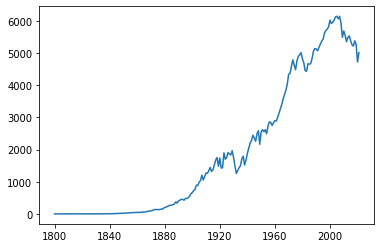

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_us_ts['year'], df_us_ts['co2'],label='co2 emmision_us')

In [ ]:
# df_us_ts['date'] = pd.to_datetime(df['year'].astype(str) + '-01-01')

In [ ]:
df_us_ts.set_index('year', inplace=True)

In [ ]:
df_us_ts

,country,co2
year,,
1800-01-01,United States,0.253
1801-01-01,United States,0.267
1802-01-01,United States,0.289
1803-01-01,United States,0.297
1804-01-01,United States,0.333
...,...,...
2017-01-01,United States,5210.958
2018-01-01,United States,5376.657
2019-01-01,United States,5259.144


In [ ]:
df_us_ts.isna().sum()

country    0
co2        0
dtype: int64

In [ ]:
df_us_ts = df_us_ts.asfreq("YS")

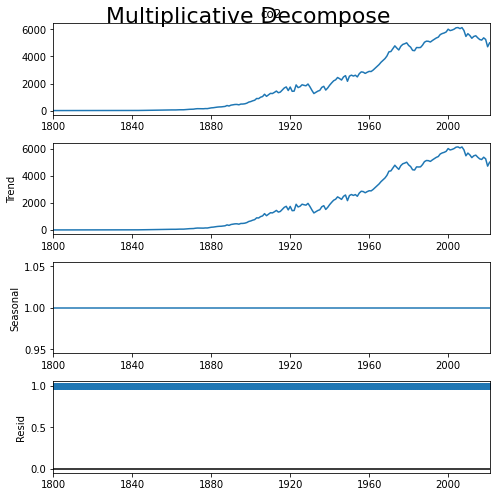

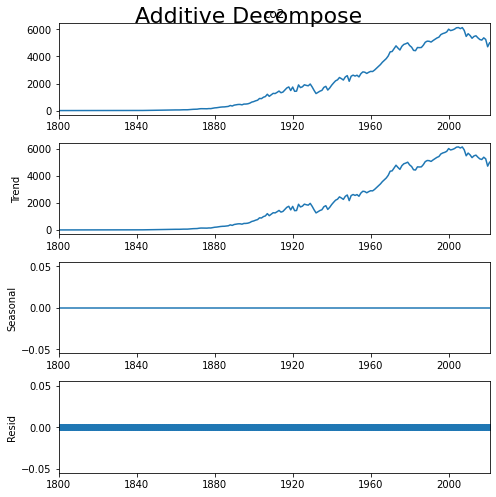

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_us_ts['co2'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_us_ts['co2'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (7,7)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
df_us_ts

,country,co2
year,,
1800-01-01,United States,0.253
1801-01-01,United States,0.267
1802-01-01,United States,0.289
1803-01-01,United States,0.297
1804-01-01,United States,0.333
...,...,...
2017-01-01,United States,5210.958
2018-01-01,United States,5376.657
2019-01-01,United States,5259.144


In [ ]:
test_size = int(0.05 * df_us_ts.shape[0])
train_ar, test_ar = train_test_split(df_us_ts['co2'],test_size = test_size)

In [ ]:
train_ar.shape, test_ar.shape

((211,), (11,))

In [ ]:
train_ar

year
1800-01-01       0.253
1801-01-01       0.267
1802-01-01       0.289
1803-01-01       0.297
1804-01-01       0.333
                ...   
2006-01-01    6057.163
2007-01-01    6135.287
2008-01-01    5918.869
2009-01-01    5482.978
2010-01-01    5681.392
Freq: AS-JAN, Name: co2, Length: 211, dtype: float64

In [ ]:
test_ar

year
2011-01-01    5546.629
2012-01-01    5345.454
2013-01-01    5480.926
2014-01-01    5528.871
2015-01-01    5376.578
2016-01-01    5251.757
2017-01-01    5210.958
2018-01-01    5376.657
2019-01-01    5259.144
2020-01-01    4715.691
2021-01-01    5007.336
Freq: AS-JAN, Name: co2, dtype: float64

In [ ]:
model = pm.auto_arima(train_ar, seasonal=False,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2729.847, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2682.739, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2727.854, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2610.992, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2609.185, Time=0.18 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=2602.796, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=2600.515, Time=0.27 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=2598.556, Time=0.41 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=2600.832, Time=0.12 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=2578.634, Time=0.38 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=2576.653, T

In [ ]:
model = pm.ARIMA((3,2,1))

In [ ]:
model.fit(train_ar)

ARIMA(order=(3, 2, 1))

In [ ]:
predictions_ar = model.predict(n_periods = test_ar.shape[0])

In [ ]:
test_ar.shape, predictions_ar.shape

((11,), (11,))

In [ ]:
test_ar

year
2011-01-01    5546.629
2012-01-01    5345.454
2013-01-01    5480.926
2014-01-01    5528.871
2015-01-01    5376.578
2016-01-01    5251.757
2017-01-01    5210.958
2018-01-01    5376.657
2019-01-01    5259.144
2020-01-01    4715.691
2021-01-01    5007.336
Freq: AS-JAN, Name: co2, dtype: float64

In [ ]:
predictions_ar

2011-01-01    5731.492476
2012-01-01    5653.250073
2013-01-01    5746.806673
2014-01-01    5819.096674
2015-01-01    5840.096078
2016-01-01    5905.659199
2017-01-01    5972.219036
2018-01-01    6021.283543
2019-01-01    6081.342099
2020-01-01    6143.928735
2021-01-01    6201.209401
Freq: AS-JAN, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(test_ar, predictions_ar)

637.8529987833949

In [ ]:
mean_squared_error(test_ar, predictions_ar)

551140.152678145

# Time series as regression of lag values

In [ ]:
df_us_lag = df_us_ts

In [ ]:
df_us_lag['lag1'] = df_us_lag['co2'].shift(1)
df_us_lag['lag2'] = df_us_lag['co2'].shift(2)
df_us_lag['lag3'] = df_us_lag['co2'].shift(3)
df_us_lag['lag4'] = df_us_lag['co2'].shift(4)
df_us_lag['lag5'] = df_us_lag['co2'].shift(5)

In [ ]:
df_us_lag.head(10)

,country,co2,lag1,lag2,lag3,lag4,lag5
year,,,,,,,
1800-01-01,United States,0.253,NaN,NaN,NaN,NaN,NaN
1801-01-01,United States,0.267,0.253,NaN,NaN,NaN,NaN
1802-01-01,United States,0.289,0.267,0.253,NaN,NaN,NaN
1803-01-01,United States,0.297,0.289,0.267,0.253,NaN,NaN
1804-01-01,United States,0.333,0.297,0.289,0.267,0.253,NaN
1805-01-01,United States,0.341,0.333,0.297,0.289,0.267,0.253
1806-01-01,United States,0.333,0.341,0.333,0.297,0.289,0.267
1807-01-01,United States,0.377,0.333,0.341,0.333,0.297,0.289
1808-01-01,United States,0.392,0.377,0.333,0.341,0.333,0.297


In [ ]:
df_us_lag.dropna(inplace=True)

In [ ]:
df_us_lag

,country,co2,lag1,lag2,lag3,lag4,lag5
year,,,,,,,
1805-01-01,United States,0.341,0.333,0.297,0.289,0.267,0.253
1806-01-01,United States,0.333,0.341,0.333,0.297,0.289,0.267
1807-01-01,United States,0.377,0.333,0.341,0.333,0.297,0.289
1808-01-01,United States,0.392,0.377,0.333,0.341,0.333,0.297
1809-01-01,United States,0.403,0.392,0.377,0.333,0.341,0.333
...,...,...,...,...,...,...,...
2017-01-01,United States,5210.958,5251.757,5376.578,5528.871,5480.926,5345.454
2018-01-01,United States,5376.657,5210.958,5251.757,5376.578,5528.871,5480.926
2019-01-01,United States,5259.144,5376.657,5210.958,5251.757,5376.578,5528.871


In [ ]:
X = df_us_lag.loc[:,['lag1','lag2','lag3','lag4','lag5']]
y = df_us_lag.loc[:,'co2']

In [ ]:
X.shape,y.shape

((217, 5), (217,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.1,
                                                 random_state=7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((195, 5), (22, 5), (195,), (22,))

# ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
en = ElasticNet(random_state=7)

In [ ]:
en.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+06, tolerance: 8.843e+04
  model = cd_fast.enet_coordinate_descent(


ElasticNet(random_state=7)

In [ ]:
y_pred = en.predict(X_test)

In [ ]:
y_pred.shape,y_test.shape

((22,), (22,))

In [ ]:
mean_absolute_error(y_test, y_pred)

75.44200986874866

In [ ]:
mean_squared_error(y_test, y_pred)

11983.608870031232

# RandomForest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=50,max_depth=5, oob_score=True,random_state=7)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True,
                      random_state=7)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('mean squared error is ',mean_squared_error(y_test,Y_pred_rf))
print('mean absolute error is ',mean_absolute_error(y_test,Y_pred_rf))

mean squared error is  11970.136472013402
mean absolute error is  77.54792469869524


In [ ]:
res = pd.DataFrame([y_test.values, y_pred, Y_pred_rf]).T
res.columns = ['Y_test', 'Y_pred_EN', 'Y_pred_rf']
res.shape

(22, 3)

<AxesSubplot:>

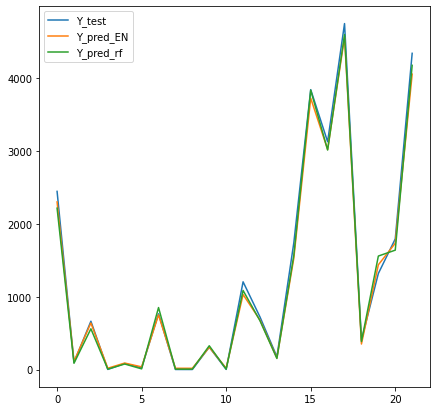

In [ ]:
res.plot()

# LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((195, 5), (22, 5), (195,), (22,))

In [ ]:
X_train[:3].values

array([[ 267.59 ,  253.883,  235.394,  210.193,  198.684],
       [5737.129, 5691.865, 5616.431, 5427.798, 5365.579],
       [1423.669, 1738.246, 1479.159, 1747.718, 1670.971]])

In [ ]:
import numpy as np
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0],X_train.shape[1], 1))

In [ ]:
X_train_lstm.shape

(195, 5, 1)

In [ ]:
X_train_lstm[:3]

array([[[ 267.59 ],
        [ 253.883],
        [ 235.394],
        [ 210.193],
        [ 198.684]],

       [[5737.129],
        [5691.865],
        [5616.431],
        [5427.798],
        [5365.579]],

       [[1423.669],
        [1738.246],
        [1479.159],
        [1747.718],
        [1670.971]]])

In [ ]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=1,return_sequences = False, 
                            input_shape= (X_train_lstm.shape[1],X_train_lstm.shape[2])))
# Adding the output layer
model.add(keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train_lstm, y_train, validation_split=0.1,epochs = 100, batch_size = 5)

Epoch 1/100
35/35 [==============================] - 3s 21ms/step - loss: 8589154.0000 - val_loss: 8921203.0000
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 8588935.0000 - val_loss: 8920972.0000
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 8584280.0000 - val_loss: 8913737.0000
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 8581924.0000 - val_loss: 8913513.0000
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 8581704.0000 - val_loss: 8913272.0000
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 8581477.0000 - val_loss: 8913032.0000
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 8581255.0000 - val_loss: 8912794.0000
Epoch 8/100
35/35 [==============================] - 0s 4ms/step - loss: 8581030.0000 - val_loss: 8912557.0000
Epoch 9/100
35/35 [==============================] - 0s 5ms/step - loss: 8580811.0000 - val_loss: 8912307.0000


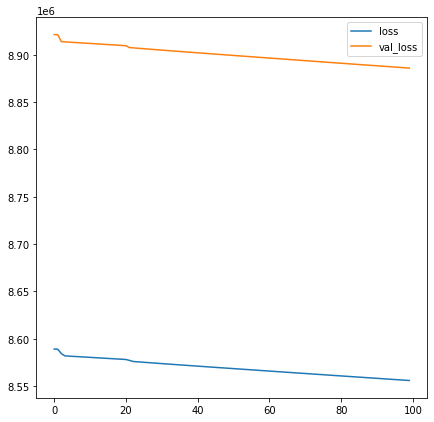

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
model = keras.Sequential()

# Adding LSTM layers 
model.add(keras.layers.LSTM(units=500,return_sequences = True, 
                            input_shape= (X_train_lstm.shape[1],X_train_lstm.shape[2])))

model.add(keras.layers.LSTM(units=100,return_sequences = False))
# Adding the output layer
model.add( keras.layers.Dense(1, activation='linear'))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train_lstm, y_train, validation_split=0.3,epochs = 1000, batch_size = 10)

Epoch 1/1000
14/14 [==============================] - 7s 172ms/step - loss: 8553105.0000 - val_loss: 8690809.0000
Epoch 2/1000
14/14 [==============================] - 1s 63ms/step - loss: 8529835.0000 - val_loss: 8676295.0000
Epoch 3/1000
14/14 [==============================] - 1s 45ms/step - loss: 8519081.0000 - val_loss: 8668464.0000
Epoch 4/1000
14/14 [==============================] - 1s 46ms/step - loss: 8512756.0000 - val_loss: 8662279.0000
Epoch 5/1000
14/14 [==============================] - 1s 45ms/step - loss: 8506658.0000 - val_loss: 8656577.0000
Epoch 6/1000
14/14 [==============================] - 1s 46ms/step - loss: 8501123.0000 - val_loss: 8650356.0000
Epoch 7/1000
14/14 [==============================] - 1s 52ms/step - loss: 8494996.0000 - val_loss: 8644561.0000
Epoch 8/1000
14/14 [==============================] - 1s 44ms/step - loss: 8489501.0000 - val_loss: 8638705.0000
Epoch 9/1000
14/14 [==============================] - 1s 42ms/step - loss: 8483633.0000 - val_l

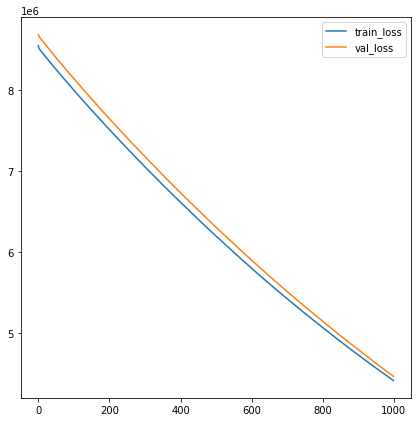

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()